#### CMSE 201 Final Project
### &#9989; Dao Chi Lam
### &#9989; Section_001
#### &#9989; 04/14/20

# ___A Country's Gross Domestic Product Vs. Its Fertility and Mortality Rates___

## Background and Motivation

    The question I am trying to answer through this project is "Is there a relationship between a country's GDP and its fertility and mortality rates?". 

I stumbled across this question when I was studying in my social science class about the prosperity of different countries. Especially, we look at three types of nation: core nations, semi-periphery nation, and periphery nation. To summarize, a core nation is one that has strong power, both politically and economically (such as the United States). While the periphery nation is a complete opposite. Hence, the semi-periphery nation is the one in between the two groups. After learning about the differences between the three types, I started to form my curiosity around whether there are any trends that lead to the differences the way it is.

## Methodology

The outline for my project is as following:

* First, determine the necessary variables to compute statistical analysis
* Next is to find the data and make sure that it is prepared to be examined
* Then, import the data and do the linear/ higher regression model on those variables
* Also caculate their correlation coeficcient

But to further the project, I also want to do some prediction based on the regression model to predict the future GDP as well.

To start outlining my project, I list out the variables I need to take into consideration. One of the way that we can measure a country prosperity is to measure their GDP. This means I need a list of GDP from a particular country over a period of time. Next, I need to find the rates of fertility and mortality of that country over the same period of time. Mortality rate, can be called death rate, is a measure of the number of deaths in a particular population. Fertility rate, is the average number of children that would be born to a woman over her lifetime.

As I am doing my research for the data source, I find the page World Bank Group's website (<https://www.worldbank.org/>). Based on my findings, they have a very accountable data bank that I can use for my project. I also do some checking to see if the data is clean and whether there is an empty/ incomplete data point. As there is none, I download the file that has the variable I am looking for:
* Countries' GDP: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?most_recent_year_desc=false&view=map&year=2018
* Countries' Fertility Rate: https://data.worldbank.org/indicator/SP.DYN.TFRT.IN/
* Countries' Mortality Rate: https://data.worldbank.org/indicator/sp.dyn.cdrt.in

After having all the necessary files on my computure, now I will start importing the module that will help me with the statistical analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

Then I will use the pandas module to start importing the data set into the notebook.

In [2]:
# Read all the necessary data to the file
GDP = pd.read_csv("SemProject_GDP.csv", skiprows = 4)
Fer_Rate = pd.read_csv("SemProject_FertilityRate.csv",skiprows = 4)
Mor_Rate = pd.read_csv("SemProject_DeathRate.csv", skiprows = 4)
# After previewing the csv files, I see that we can just import the data starting from row 4.
# Because everything above is only the introduction to the data

I choose the United States (a core nation) to be the country I want to examine. So in this next cell, I will extract the US's data out of the three data frame.

In [3]:
# In this cell, I also transform the series from the data frame into an array
# By having the data in the array form, it will make the implementation of data into the regression model easier
# And since the fertility and mortality rates only have data from 1960 - 2017, I will also only take that range of data from the GDP set as well
US_GDP_Series = GDP.loc[249]
US_GDP_Array = np.array(US_GDP_Series[4:62], dtype = float)

US_Mortality_Series = Mor_Rate.loc[249]
US_Mortality_Array = np.array(US_Mortality_Series[4:62], dtype = float)

US_Fertility_Series = Fer_Rate.loc[249]
US_Fertility_Array = np.array(US_Fertility_Series[4:62], dtype = float)

# Creating an array for 1960 - 2017
Years = np.arange(1960,2018)

This is where I will start the implementation of the regression model. In order to know whether the linear or higher regression model is the best fit for the data, I need to first test out with the linear model then decide on the order of the polynomial function based on it. So in this next Markdown cell, I create a linear fit to the GDP and fertility rates using  the functions 'polyfit'(to estimate parameters) and 'poly1d' (to create a function to model predicted results) from NumPy.

After that, I will also do a caculation for correlation coeficcient between the two variables to see the relationship between the two.

In [4]:
# GDP vs. Mortality
parameters = np.polyfit(US_GDP_Array, US_Mortality_Array, 2)
my_poly_function = np.poly1d(parameters)
expected_y_poly = my_poly_function(US_GDP_Array)

# Testing the correlation between two variables
corr, _ = pearsonr(US_GDP_Array, US_Mortality_Array)

Next, I will perform the same task for the two variables: GDP and mortality rate. 

In [5]:
# GDP vs. Fertility 
parameters2 = np.polyfit(US_GDP_Array, US_Fertility_Array, 2)
my_poly_function2 = np.poly1d(parameters2)
expected_y_poly2 = my_poly_function2(US_GDP_Array)

# Testing the correlation between two variables
corr1, _ = pearsonr(US_GDP_Array, US_Fertility_Array)

For this next step, I want to predict the future. To be specific, I want to predict one of the variables based on the data we are given. The chosen variable for this step will be the country's GDP. I want to see with the following trend, what will the US's future GDP be like in the next 50 years. Also, what is the current trend from 1960 - 2017 is like (linear or exponential trends)?

In [6]:
# Creating a linear fit for GDP data
new_year = np.arange(Years[-1],Years[-1] + 50, 1)

parameters3 = np.polyfit(Years, US_GDP_Array, 2)
my_poly_function3 = np.poly1d(parameters3)
expected_y_poly3 = my_poly_function3(Years)
expected_y_poly3_1 = my_poly_function3(new_year)

## Results

As all the codes for my analysis work, I inititated my analysis with finding the relationship between US GDP anf its mortality rates. As we can see from the graph and the parameter values printed, there seem to be a relatively strong negative _exponential_ relationship between the two variables (we can see it clearly in the fitted line). But based on the data alone, there is a sharp decrease in the mortality when the GDP is bellow 0.3. Then, it stops decreasing and the curve is soften when GDP is in the middle of 0.3 and 0.8. Then it decreases again from 0.8 to 1.5; but not as sharp as the beginning. Then from there, the curve went up. 

This caused me to question why the curve is the way it is: "Isn't it supposed to be that the higher the GDP, the curve should be somewhat have a negative linear relationship instead of _exponential_ ?" As I research, from 1950 - 1975 (from the second plot, it is where the fertility curve has not changed), the US was involved with the Vietnam War. For the rise of mortality starting from 2010 onward, based on Center for Disease Control and Prevention: " five major causes of death (heart disease, cancer, chronic lower respiratory diseases, stroke, and accidents) accounted for 63 percent of all deaths in the United States." But that might not completely desribe why there is such a high rise.

[ 5.60573598e-27 -1.63647308e-13  9.42413600e+00]


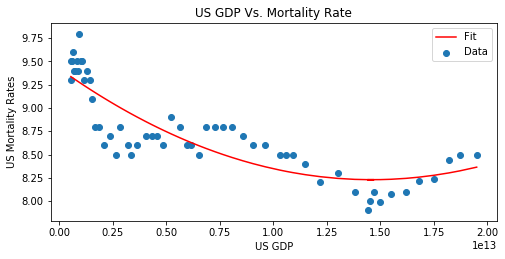

Pearsons correlation: -0.805


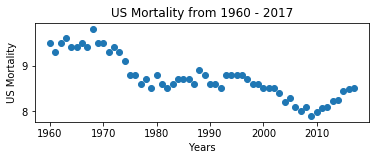

In [7]:
print(parameters)

plt.figure(figsize = (8,8))

plt.subplot(211)
plt.scatter(US_GDP_Array, US_Mortality_Array, label = "Data")
plt.plot(US_GDP_Array, expected_y_poly, color = "red", label = "Fit")
plt.title('US GDP Vs. Mortality Rate')
plt.ylabel('US Mortality Rates')
plt.xlabel('US GDP')
plt.legend()
plt.show()

plt.subplot(212)
plt.scatter(Years, US_Mortality_Array)
plt.title('US Mortality from 1960 - 2017')
plt.ylabel('US Mortality')
plt.xlabel('Years')

print('Pearsons correlation: %.3f' % corr)

For the next part of the 'Methodology' part, I did the same analysis on finding the relationship between the two values: US GDP and its fertility rate. By examining the first graph and its parameter values, I want to ignore the fact that many outliers causes the graph to be messy. But the data and the fitted line indicate that there is a  negative _exponential_ relationship between the two variables. Looking from the graph fertility rates over time, from 1960 to 1975, there is a sharp decrease in the fertility rate (from 3.75 to below 1.75). Then it stays the same rate from then to late 1980. After that, it does have a slight increase then it stay at that rate until 2006. It drops low again afterward.

It does not supprise me why the graph is the way it is. There is one question I want to find an answer to: why there is such a sharp decrease in fertility rate from 1960 to 1975. While I could not find any specific information related to such matter, I also found that, from the Newsweek article, the reason why there continue to be a decline after 2008 is because many American women are waiting to have kids due to the great recession. They further explain that it is because these women prefer to putting off having children in favor of their careers. This is true because the country is getting more advanced (can be proven based on the rise of GDP) and that has changed the mindset of people into careerer-focused.

[ 5.60573598e-27 -1.63647308e-13  9.42413600e+00]


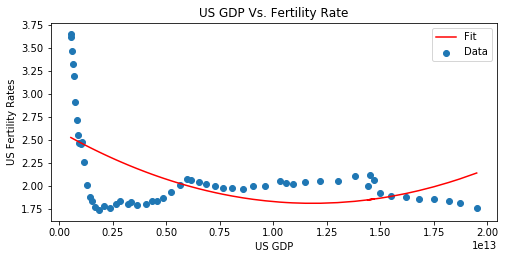

Pearsons correlation: -0.425


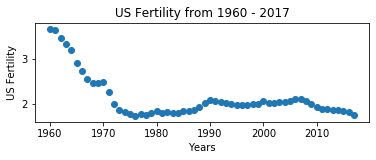

In [8]:
print(parameters)

plt.figure(figsize = (8,8))

plt.subplot(211)
plt.scatter(US_GDP_Array, US_Fertility_Array, label = "Data")
plt.plot(US_GDP_Array, expected_y_poly2, color = "red", label = "Fit")
plt.title('US GDP Vs. Fertility Rate')
plt.ylabel('US Fertility Rates')
plt.xlabel('US GDP')
plt.legend()
plt.show()

plt.subplot(212)
plt.scatter(Years, US_Fertility_Array)
plt.title('US Fertility from 1960 - 2017')
plt.ylabel('US Fertility')
plt.xlabel('Years')

print('Pearsons correlation: %.3f' % corr1)

In the cell below, I also did the same analysis but with the outliers removed from the graph. The reason for this is to see if this will help the fitted line desribe the data more accurate and the correlation to be higher. I decided the period from 1960 - 1975 to be the outlier and remove all their data points. As the result, the fitted line is more accurate compare to the graph above; though the correlation coefficient is still low: 0.2 This might due to the relationship between the two variables are exponential and not linear. But removing the outlier does not quite help in determining the relationship of the data. Since the little spike of fertility rate between 1990 to 2008 was because several factos, such as: steady flow of immigrants from higher-fertility countries, stable economy, etc.

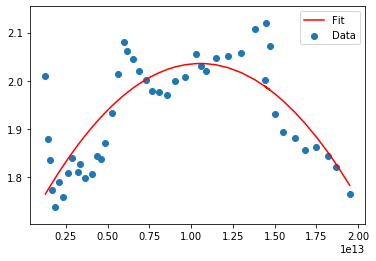

Pearsons correlation: 0.279


In [9]:
# GDP vs. Fertility  with the outliers removed
US_Fertility_Array_2 = US_Fertility_Array[US_Fertility_Array < 2.25]
US_GDP_Array_2 = US_GDP_Array[12:]

parameters_4 = np.polyfit(US_GDP_Array_2, US_Fertility_Array_2, 2)
my_poly_function_4 = np.poly1d(parameters_4)
expected_y_poly_4 = my_poly_function_4(US_GDP_Array_2)

plt.scatter(US_GDP_Array_2, US_Fertility_Array_2, label = "Data")
plt.plot(US_GDP_Array_2, expected_y_poly_4, color = "red", label = "Fit")
plt.legend()
plt.show()

# Testing the correlation between two variables
corr2, _ = pearsonr(US_GDP_Array_2, US_Fertility_Array_2)
print('Pearsons correlation: %.3f' % corr2) # It has a low correlation coeficcient because a linear relationship will not descripe these points well (because it has a parabolla curve) 

The result for US's GDP is quite expected: since the fitted line is very accurate with the data. Based on the shape, US GDP will have an exponential growth toward the future. As we predict for the US’s GDP for the next 50 years, without disaster such as the pandemic taking into the account, the US should reach far above 60 trillions USD (although it is not completely realistic). Because of this we also expect from the previous analysis, that the fertility and mortality rates would be low in the future.

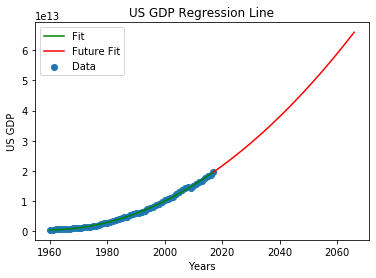

In [10]:
plt.scatter(Years, US_GDP_Array, label = "Data")
plt.plot(Years, expected_y_poly3, color = "green", label = "Fit")
plt.plot(new_year, expected_y_poly3_1, color = "red", label = "Future Fit")
plt.title('US GDP Regression Line')
plt.ylabel('US GDP')
plt.xlabel('Years')
plt.legend()
plt.show()

## Discussion and Conclusion

As the result, we are confident to say that the higher the GDP is, the lower the mortality rate is (get close to zero). The decrease rate is about -1.0 per 20 years. And if that is the same for the fertility rate, as we predicted the GDP for the next 50 years, the mortality rate and fertility rate should also decrease for that period of time (for the United States).

But there can still be improvement for the research. The first thing is that I should find a wider range of data that cover more years pior to 1960. This is to capture what happended before the spike of fertility rate in 1960 so I can better analyze the data and give a better conclusion. Seond, I should have done more country than just the United States alone to make sure that the conclusion is not bias. But the reason why I did not do it is that, in order to have the conclusion be statistically significant, I need to do at least 30 countries. 

### References

Hartnett, Caroline Sten. “US Fertility Is Dropping. Here's Why Some Experts Saw It Coming.” The Conversation, 8 July 2019, theconversation.com/us-fertility-is-dropping-heres-why-some-experts-saw-it-coming-97037.

Matthews, Melissa. “As U.S. Birth Rates Drop, Some Say We Have a Serious Fertility Problem.” Newsweek, Newsweek, 30 Nov. 2017, www.newsweek.com/fertility-problem-us-rate-declines-sperm-issues-and-delays-marriage-727429.

“Death in the United States, 2010.” Center for Disease Control and Prevention, www.cdc.gov/nchs/data/databriefs/db99.pdf.

“Death Rate, Crude.” World Bank Group, data.worldbank.org/indicator/sp.dyn.cdrt.in.

“Fertility Rate, Total.” World Bank Group, data.worldbank.org/indicator/sp.dyn.tfrt.in.

“GDP.” World Bank Group, data.worldbank.org/indicator/NY.GDP.MKTP.CDmost_recent_year_desc=false&amp;view=map&amp;year=2018.

